# Proyek Analisis Data: [Bike Sharing Dataset ]
- **Nama:** Hafil Jammi'us Syaghir
- **Email:** m179b4ky1666@bangkit.academy
- **ID Dicoding:** hafil_jammi'us_syaghir_m179b4ky1666_bhl0:






## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan hari dalam seminggu dan tipe pengguna (casual vs registered)? Apakah ada perbedaan yang signifikan antara weekday dan weekend?
- Pertanyaan 2:  Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda secara keseluruhan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

**Insight:**
- Terdapat dua dataset yang digunakan, yaitu day.csv dan hour.csv.
- day.csv berisi data peminjaman sepeda per hari, sedangkan hour.csv berisi data peminjaman sepeda per jam.

### Assessing Data

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
 - Dataset day.csv memiliki 731 baris dan 16 kolom.
 - Dataset hour.csv memiliki 17379 baris dan 17 kolom.
 - Terdapat beberapa kolom dengan tipe data integer dan float, yang menunjukkan data numerik.
 - Terdapat kolom dengan tipe data object yang kemungkinan besar merupakan data kategorikal.


### Cleaning Data

In [ ]:
day_df = day_df.drop('instant', axis=1)
hour_df = hour_df.drop('instant', axis=1)

**Insight:**
- Kolom 'instant' dihapus dari kedua dataset karena tidak relevan untuk analisis.
- Menghapus kolom yang tidak perlu dapat meningkatkan efisiensi dan performa analisis.


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x in (6, 0) else 0)
weekend_usage = day_df.groupby('is_weekend')[['cnt', 'casual', 'registered']].mean()
weather_rentals = day_df.groupby('weathersit')['cnt'].sum()

**Insight:**
- Kolom 'is_weekend' ditambahkan untuk menandai hari weekend (1) dan weekday (0).
- Rata-rata jumlah peminjaman sepeda, baik untuk pengguna casual maupun registered, dihitung untuk weekday dan weekend.
- Total peminjaman sepeda berdasarkan kategori cuaca dihitung untuk melihat pengaruh cuaca terhadap peminjaman.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

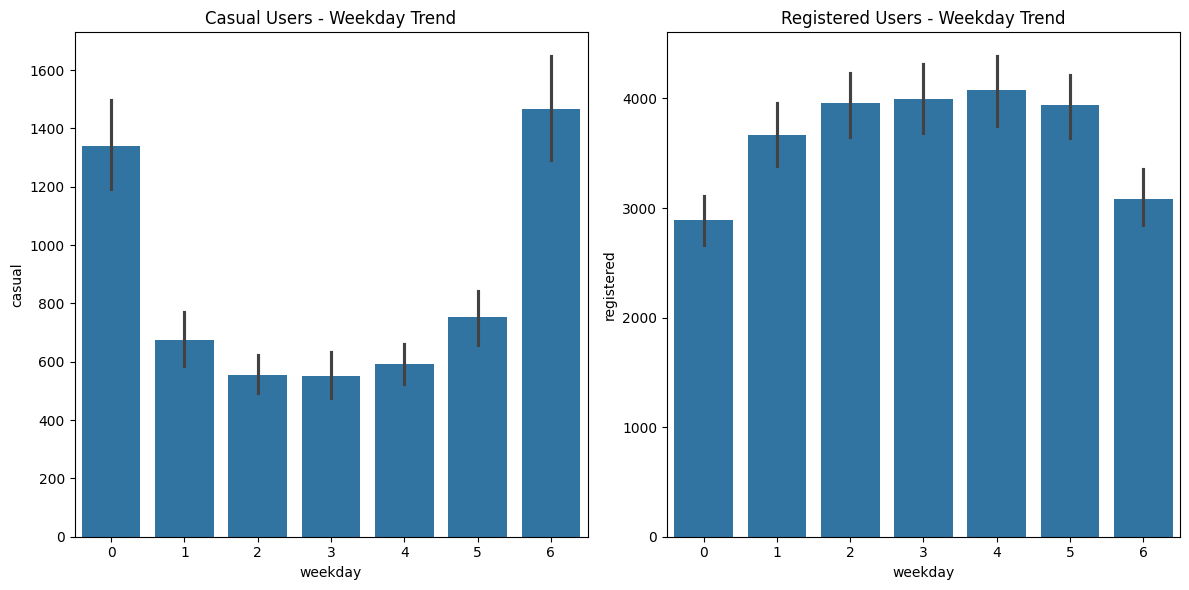

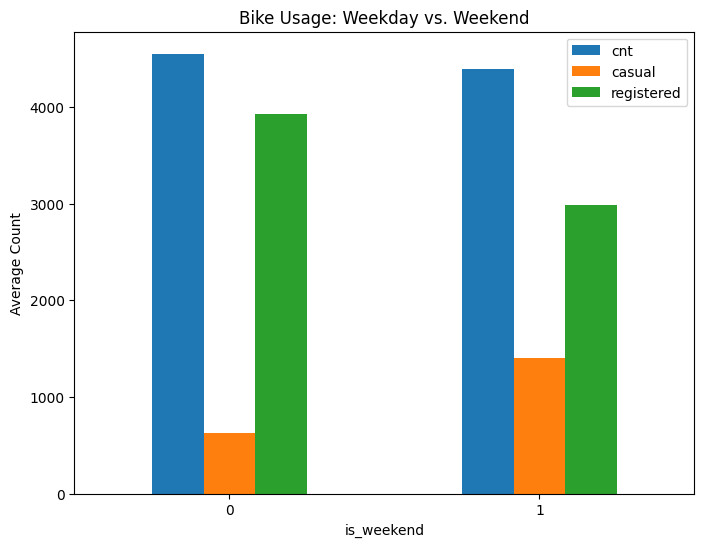

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='weekday', y='casual', data=day_df)
plt.title('Casual Users - Weekday Trend')
plt.subplot(1, 2, 2)
sns.barplot(x='weekday', y='registered', data=day_df)
plt.title('Registered Users - Weekday Trend')
plt.tight_layout()
plt.show()

weekend_usage.plot(kind='bar', figsize=(8, 6))
plt.title('Bike Usage: Weekday vs. Weekend')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 2:

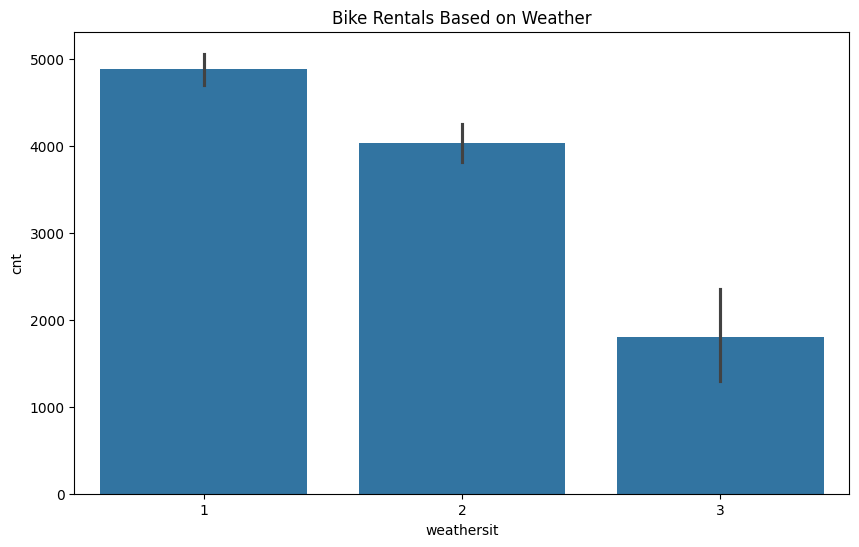

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.title('Bike Rentals Based on Weather')
plt.show()

**Insight:**
-Terlihat bahwa pengguna casual lebih banyak menggunakan sepeda di akhir pekan, sedangkan pengguna registered lebih banyak menggunakan sepeda di hari kerja.
- Cuaca yang cerah (weathersit 1) memiliki jumlah peminjaman sepeda tertinggi, sedangkan cuaca buruk (weathersit 3) memiliki jumlah peminjaman terendah.

## Analisis Lanjutan (Opsional)

## Conclusion

Conclution pertanyaan 1: Pengguna terdaftar menunjukkan pola peminjaman yang lebih tinggi di hari kerja, sedangkan pengguna casual lebih aktif di akhir pekan. Hal ini mengindikasikan bahwa pengguna terdaftar cenderung menggunakan layanan bike sharing untuk aktivitas rutin seperti komuting, sementara pengguna casual menggunakannya untuk rekreasi di akhir pekan.

Conclution pertanyaan 2:  Cuaca memiliki pengaruh yang kuat terhadap jumlah peminjaman sepeda. Cuaca cerah (weathersit 1) mendorong peminjaman, sedangkan cuaca buruk (weathersit 2 & 3) secara signifikan mengurangi jumlah peminjaman.  Perusahaan bike sharing dapat mempertimbangkan strategi pemasaran atau operasional yang disesuaikan dengan kondisi cuaca.